**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Redes Neuronales Convolucionales

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Referencias
1. Ian Goodfellow, Yosua Bengio and Aaron Courville, Deep Learning, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, A guide to convolution arithmetic for deep learning, ArXiv:1603.07285v2, 2018
3. [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
4. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

## Contenido

* [Introducción](#Introducción)
* [Casos de Estudio](#Casos-de-Estudio)
    * [MNIST](#MNIST)
    * [MNIST Fashion](#MNIST-Fashion)
    * [Dogs vs. Cats](#Dogs-vs.-Cats)
    * [Horse or Human](#Horse-or-Human)
    * [Piedra Papel o Tijeras](#Piedra-Papel-o-Tijeras)

## Introducción 

En el anterior episodio...

**Recordemos que todo este proceso es para construir redes de esta manera:**

![cnn-arq](https://miro.medium.com/max/576/1*uUYc126RU4mnTWwckEbctw@2x.png)

Fuente: [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#7d8a)

Hoy veremos algunos ejemplos memorables de redes neuronales convolucionadas.

Primero, importemos los módulos que necesitamos para nuestro estudio:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Nunca sobra comprobar la versión actual de tensorflow para futuros chequeos de inconsistencias:

In [ ]:
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.3.0


## MNIST

Construyamos una red convolucional para ver el beneficio sobre una red densa.

Para este proceso, realicemos nuestra rutina de cargar los datos, observar unos cuantos ejemplos y comprobar unas cuantas estadísticas:

### Carga de Datos 

In [ ]:
# apunta  los datos
mnist = tf.keras.datasets.mnist

# lee los conjuntos de datos, los cuales vienen separados de antemano para entrenamiento y test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Verificar forma de los datos
print("Forma de los datos:",training_images.shape)

Forma de los datos: (60000, 28, 28)


### Pre-procesamiento 

In [ ]:
# reshape para colocar los datos de entrenamiento en el fomato apropiado.
# Agrega una dimensión al final y  normaliza los datos
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# reshape para colocar los datos de test en el fomato apropiado. Agrega una dimensión al final y  normaliza los datos
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

print("Nueva forma de los datos:", training_images.shape)

Nueva forma de los datos: (60000, 28, 28, 1)


### Visualización 

Datos en bruto

[[0.         0.         0.         0.07843137 0.88627451]
 [0.         0.         0.02745098 0.52156863 0.99215686]
 [0.         0.         0.49411765 0.99215686 0.99215686]
 [0.         0.01176471 0.69803922 0.99215686 0.98823529]
 [0.         0.49019608 0.99215686 0.99215686 0.94117647]] 

Imagen Asociada



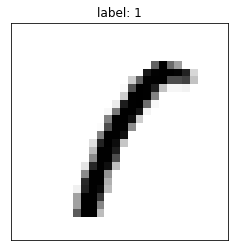

In [ ]:
# muestra una imagen de entranamiento
azar=np.random.randint(len(training_images))
print("Datos en bruto\n")
print(training_images[azar,10:15,10:15,0],'\n')


print("Imagen Asociada\n")
plt.imshow(training_images[azar,:,:,0],cmap='binary')
plt.xticks([], [])
plt.yticks([], [])
plt.title('label: ' +str(training_labels[azar]))
plt.show()

### Definir el Modelo 

1. Capa 1: **Conv2D** con 32 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

2. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

3. Capa 3. **Flatten**. Toma todos los filtros resultantes  de la capa MaxPooling y los organiza como un único tensor unidimensional

4. Capa 4. **Dense**. Recibe el tensor saliente de la capa Flatten y genera una salida en 128 unidades, usando activación *relu*

5. Capa 5. **Dense**. Recibe el tensor unidmensional de tamaño 128 y lo transforma en la salida de 10 unidades. Hay 10 clases.

El predictor es al final transformado por la acticación *softmax* para obtener una distribución de la posible clase para la imagend e entrada

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Es de **Extremada importancia** ver el diseño de la red para ver qué tantos parámetros tiene el modelo:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


### Crea una clase derivada de tf.keras.callbacks.Callback 

Se usa para pasar funciones de control al algoritmo de estimación. 

Aquí la usaremos para el entrenamiento pare cuando se alcance un determinado accuracy con los datos de entrenamiento.

*tf.keras.callbacks.Callback* es una clase abstracta para permitir escribir métodos que actuan en el proceso de entranamiento o de test. Para detalles vea [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [ ]:
class MNIST_Callback(tf.keras.callbacks.Callback):
    
    # método dentro de la clase myCallback, heredada de la clase Callback de keras
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.985):
            print("\nSe alcanzó un 98.5% de precisión en la validación! Cancelando Entrenamiento...")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = MNIST_Callback()

Observen como se pasan los callbacks

### Compilar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrena el modelo

In [ ]:
history = model.fit(training_images, training_labels, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=64,
                    callbacks=[accu_callback])

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1891 - accuracy: 0.9436 - val_loss: 0.0742 - val_accuracy: 0.9781
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0612 - accuracy: 0.9815 - val_loss: 0.0599 - val_accuracy: 0.9829
Epoch 3/20
738/750 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.9878
Se alcanzó un 98.5% de precisión en la validación! Cancelando Entrenamiento...
750/750 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0505 - val_accuracy: 0.9862


### Evaluar el modelo

Veremos ahora qué tan bien hizoel modelo en su fase de entrenamiento, viendo las gráficas de entrenamiento tanto en pérdida como en precisión.

### Gráficas de funciones de pérdida y accuracy

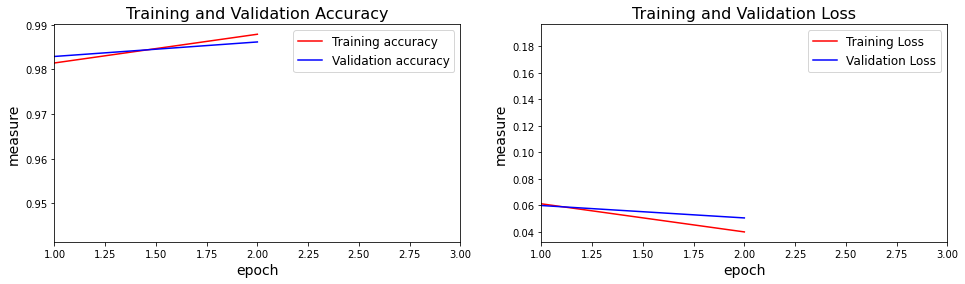

In [ ]:
import matplotlib.pyplot as plt

# Del objeto history, podemos sacar la información guardada a traveś del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])

plt.show()

### Evaluar el modelo con los dato de prueba (test)

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9860


[0.046925775706768036, 0.9860000014305115]

### Guardar Modelo (Pesos + Diseño)

In [ ]:
model.save('/tmp/model_MNIST.h5')

### Muestra de algunas predicciones

Calcula las clases predichas las probabilidades calculadas por softmax

In [ ]:
preds = model.predict(test_images)
print(preds.shape)

(10000, 10)


Observemos que las predicciones vienen en forma de probabilidad:

In [ ]:
#Elegir un elemento de test al azar
azar_test=np.random.randint(len(test_images))

#mostrar vecto de probabilidades (resultado del softmax)
print(preds[azar_test])

[2.9872886e-09 1.5156196e-10 1.4360340e-09 6.5395893e-09 3.8700456e-08
 4.6279729e-07 5.1647328e-07 2.4466917e-10 9.9999893e-01 4.9302251e-09]


Así pues, elegiremos el indice de la mayor probabilidad para elegir la etiqueta predicha:


In [ ]:
# Calcular el ínidce máximo por filas
label_preds=np.argmax(preds,axis=1)
print("Cuántos label predichos:",label_preds.shape,'\n')
print("Predicciones:\n")
print(label_preds)

Cuántos label predichos: (10000,) 

Predicciones:

[7 2 1 ... 4 5 6]


Así pues, de nuestro elemento elegido al azar, podemos decir que la predicción es:

In [ ]:
print("Etiqueta predicha:",label_preds[azar_test])

Etiqueta predicha: 8


Máquina vs Humano



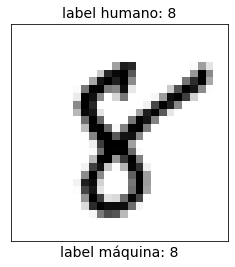

In [ ]:
print("Máquina vs Humano\n")
plt.imshow(test_images[azar_test,:,:,0],cmap='binary')
#plt.axis('off')
plt.title('label humano: ' +str(test_labels[azar_test]),fontsize=14)
plt.xlabel("label máquina: "+str(label_preds[azar_test]),fontsize=14)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### Detección de malas predicciones

In [ ]:
bad_pred=[]
for i in range (len(preds)):
    if label_preds[i]!=test_labels[i]:
        bad_pred.append(i)

bad_pred=np.array(bad_pred)

In [ ]:
print("Malas Predicciones:\n\n",bad_pred,'\n')
print("Cuántas: ",bad_pred.shape[0])

Malas Predicciones:

 [  18   92  259  321  340  445  543  646  659  684  844  882  883  947
  965 1014 1039 1182 1226 1232 1247 1319 1393 1414 1530 1678 1681 1686
 1709 1717 1754 1790 1878 1901 1955 2018 2098 2118 2129 2130 2135 2161
 2189 2293 2369 2406 2414 2437 2454 2462 2488 2597 2654 2720 2742 2760
 2896 2921 2939 2995 3030 3060 3073 3422 3474 3503 3520 3558 3559 3597
 3599 3694 3727 3749 3751 3796 3808 3811 3850 3853 3902 3906 4075 4163
 4176 4224 4248 4256 4289 4294 4350 4369 4425 4497 4504 4536 4571 4740
 4763 4807 4814 4823 4956 5634 5642 5887 5937 5955 6091 6505 6532 6555
 6571 6574 6576 6597 6625 6755 7121 7434 8059 8069 8094 8095 8408 8527
 9009 9015 9587 9634 9638 9664 9679 9692 9698 9729 9770 9811 9839 9982] 

Cuántas:  140


Mala Predicción:



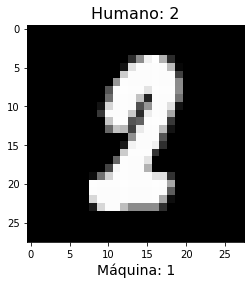

In [ ]:
azar_test= np.random.randint(len(bad_pred))
print("Mala Predicción:\n")

plt.title('Humano: ' +str(test_labels[bad_pred[azar_test]]),fontsize=16)
plt.imshow(test_images[bad_pred[azar_test],:,:,0],cmap='gray')
plt.xlabel("Máquina: "+str(np.argmax(preds[bad_pred[azar_test]])),fontsize=14)
plt.show()

### Matriz de Confusión 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix:\n')
print(confusion_matrix(test_labels, label_preds),'\n')

print(classification_report(test_labels, label_preds))

Confusion Matrix:

[[ 977    1    0    0    0    1    0    1    0    0]
 [   0 1131    2    0    0    0    0    1    1    0]
 [   4    8 1005    0    1    0    2    8    4    0]
 [   1    0    0 1003    0    3    0    1    2    0]
 [   0    1    0    0  978    0    0    0    1    2]
 [   2    0    0    6    0  881    3    0    0    0]
 [   9    2    0    0    2    5  938    0    2    0]
 [   1    1    5    2    0    0    0 1018    1    0]
 [   6    0    2    1    1    1    1    5  953    4]
 [   4    2    0    2   14    3    0    7    1  976]] 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7   

### Test Propio

Para que pueda funcionar este ejemplo, el estudiante deberá subir las imágenes desde la estructura de directorio de GitHub a Google Drive.

O el usuario podría hacer su propio ejemplo, procesarlo y ver sus propios resultados. 

La decisión la dejamos a libertad de su imaginación.

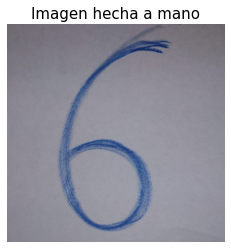

In [ ]:
from PIL import Image

# Path_local = '../Imagenes/mi_fotico.jpeg

mi_fotico=Image.open("/mi_fotico.jpeg")

plt.title('Imagen hecha a mano',fontsize=15)
plt.imshow(mi_fotico,cmap='binary')
plt.axis('off')
plt.show()

Luego de un pre-procesamiento (convertir la imagen a blanco y negro y a 28x28), podemos ver el input del modelo:

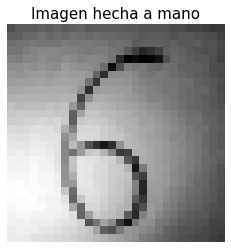

Forma de los datos: (28, 28)
Nueva Forma de los datos: (1, 28, 28, 1)


In [ ]:
#Más opciones:
# test_reduced.png
# test_reduced_2.png
# test_reduced_3.png

mi_dibujito=Image.open("/test_reduced_2.png")
mi_dibujito=mi_dibujito.convert('L')

# test_reduced and test_reduced_2 tienen la información invertida
data_mi_dibujito=(255-np.array(mi_dibujito))/255.

# Para test_reduced_3
#data_mi_dibujito=(np.array(mi_dibujito))/255.

plt.title('Imagen hecha a mano',fontsize=15)
plt.imshow(data_mi_dibujito,cmap='binary')
plt.axis('off')
plt.show()


#print(data_mi_dibujito[:28,10:25])
print("Forma de los datos:",data_mi_dibujito.shape)
data_mi_dibujito=data_mi_dibujito.reshape(1,28,28,1)
print("Nueva Forma de los datos:",data_mi_dibujito.shape)

In [ ]:
yo_pred=model.predict(data_mi_dibujito)
print(yo_pred,'\n')
print("Número predicho:",np.argmax(yo_pred))

[[0.05864483 0.04481293 0.11359599 0.1407424  0.03110324 0.22798136
  0.16183436 0.02475156 0.12504539 0.07148801]] 

Número predicho: 5


Podemos ver que el modelo depende muchas veces de la forma en que ingresen los datos de entrada.

Para el ejercicio de la tablet digital, **¡nada mal!**

[[Volver al Inicio]](#Contenido)

## MNIST Fashion

Hagamos el mismo proceso anterior, pero ésta vez usando el conjunto de prendas **MNIST Fashion**.

Comenzamos cargando los datos:


### Carga de Datos 

In [ ]:
# apunta  los datos
mnist_fashion = tf.keras.datasets.fashion_mnist

# lee los conjuntos de datos, los cuales vienen separados de antemano para entrenamiento y test
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

# Verificar forma de los datos
print("Forma de los datos de entrenamiento:",training_images.shape)

Forma de los datos de entrenamiento: (60000, 28, 28)


### Pre-procesamiento 

In [ ]:
# reshape para colocar los datos de entrenamiento en el fomato apropiado.
# Agrega una dimensión al final y  normaliza los datos
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# reshape para colocar los datos de test en el fomato apropiado. Agrega una dimensión al final y  normaliza los datos
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

print("Nueva forma de los datos de entrenamiento:", training_images.shape)

Nueva forma de los datos de entrenamiento: (60000, 28, 28, 1)


### Etiquetas

No olvidemos que a pesar de tener etiquetas en forma de número en nuestro conjunto de datos, ellas corresponden a nombres de objetos.

No debemos perder ésta conexión, así que traemos la lista de nombres por aparte:

In [ ]:
nombres_prendas = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botines']

### Visualización 

Datos en bruto:

[[0.         0.01568627 0.         0.         0.02352941]
 [0.         0.         0.         0.01568627 0.64313725]
 [0.         0.19215686 0.68627451 0.92156863 0.75294118]
 [0.64313725 0.84705882 0.76470588 0.31764706 0.50980392]
 [0.72941176 0.35294118 0.70980392 0.84705882 0.68627451]] 

Imagen Asociada:



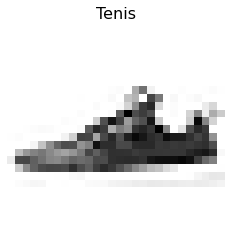

In [ ]:
# muestra una imagen de entranamiento
azar=np.random.randint(len(training_images))
print("Datos en bruto:\n")
print(training_images[azar,10:15,10:15,0],'\n')


print("Imagen Asociada:\n")
plt.imshow(training_images[azar,:,:,0],cmap='binary')
plt.axis('off')
plt.title(str(nombres_prendas[training_labels[azar]]),fontsize=16)
plt.show()

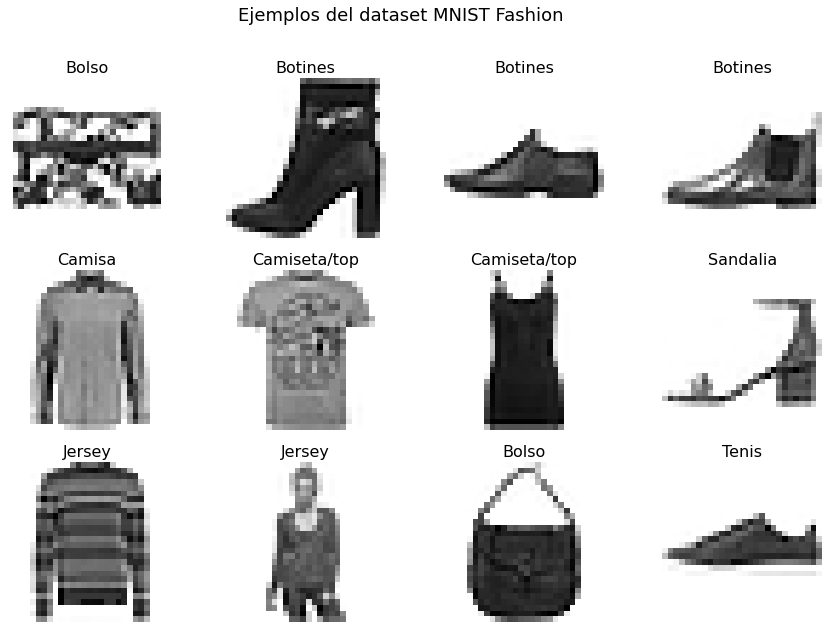


Indices Elegidos:  [10000 58789 30185 23640 17069 14876   222 11954 40132 32404 37679 10441] 


Elementos Elegidos:  [8 9 9 9 6 0 0 5 2 2 8 7] 



In [ ]:
#Cuántas filas
filas=3
#Cuantas columnas
colus=4
#Elementos totales
n=filas*colus
#Elegir una muestra del dataset via índices
vector_azar=np.random.randint(len(training_images),size=(n,))
# contador para dibujar en la grilla
w=1
#iniciar espacio de dibujo
plt.figure(figsize=(15,10))
#titulo
plt.suptitle("Ejemplos del dataset MNIST Fashion",fontsize=18)

# Loop anidado para recorrer la matriz completa
for i in range(filas):
    for j in range(colus):
        
        # subplots se peden contar incrementalmente
        plt.subplot(filas,colus,w)
        # dibujar el ejemplo de la muestra convertida a una matrix 28X28
        plt.imshow(training_images[vector_azar[w-1]].reshape((28, 28)), cmap="binary")
        #mostrar la etiqueta dada por el humano a dicho ejemplo (Aprendizaje supervisado)
        plt.title(nombres_prendas[training_labels[vector_azar[w-1]]],fontsize=16)
        #No mostrar ejes corrdenados
        plt.axis("off")
        # Incrementar contador
        w+=1

plt.show()
#mostrar índices de los ejemplos elegidos
print("\nIndices Elegidos: ",vector_azar,"\n")
# mostrar etiquetas correspondientes
print("\nElementos Elegidos: ",training_labels[vector_azar],"\n")

### Definir el Modelo 

1. Capa 1: **Conv2D** con 64 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

2. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

3. Capa 1: **Conv2D** con 64 filtros (kernels) de tamaño 3*3. Cada image viene en un tensor de tamaño 28 x 28 x 1. Los filtros son pasados por una f. de activación 'relu'.

4. Capa 2. **MaxPooling**. Reduce cada filtro. Toma regiones secuenciales 2*2 y los reduce tomando el máximo de cada región. No usa f. de activación.

5. Capa 3. **Flatten**. Toma todos los filtros resultantes  de la capa MaxPooling y los organiza como un único tensor unidimensional

6. Capa 4. **Dense**. Recibe el tensor saliente de la capa Flatten y genera una salida en 128 unidades, usando activación *relu*

7. Capa 5. **Dense**. Recibe el tensor unidmensional de tamaño 128 y lo transforma en la salida de 10 unidades. Hay 10 clases.

El predictor es al final transformado por la acticación *softmax* para obtener una distribución de la posible clase para la imagend e entrada

In [ ]:
model = tf.keras.models.Sequential([
    ###Capas convolucionadas
    
    #Convolución 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    #Pooling 1
  tf.keras.layers.MaxPooling2D(2, 2),
    #Convolución 2
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Pooling 2
  tf.keras.layers.MaxPooling2D(2,2),
    
    ###Capas Densas
    
    # Aplanamiento
  tf.keras.layers.Flatten(),
    #Capa Densa
  tf.keras.layers.Dense(128, activation='relu'),
    #Capa densa, clasificación
  tf.keras.layers.Dense(10, activation='softmax')
])

Es de **Extremada importancia** ver el diseño de la red para ver qué tantos parámetros tiene el modelo:

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

### Crea una clase derivada de tf.keras.callbacks.Callback 

Se usa para pasar funciones de control al algoritmo de estimación. 

Aquí la usaremos para el entrenamiento pare cuando se alcance un determinado accuracy con los datos de entrenamiento.

*tf.keras.callbacks.Callback* es una clase abstracta para permitir escribir métodos que actuan en el proceso de entranamiento o de test. Para detalles vea [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [ ]:
class MNIST_Callback(tf.keras.callbacks.Callback):
    
    # método dentro de la clase myCallback, heredada de la clase Callback de keras
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nSe alcanzó un 99.9% de precisión en el entrenamiento! Cancelando Entrenamiento...")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = MNIST_Callback()

Observen como se pasan los callbacks

### Compilar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Entrena el modelo

In [ ]:
history = model.fit(training_images, training_labels, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=64,
                    callbacks=[accu_callback])

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4924 - accuracy: 0.8229 - val_loss: 0.3811 - val_accuracy: 0.8625
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3246 - accuracy: 0.8834 - val_loss: 0.3160 - val_accuracy: 0.8862
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2774 - accuracy: 0.8985 - val_loss: 0.3016 - val_accuracy: 0.8913
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2469 - accuracy: 0.9083 - val_loss: 0.2652 - val_accuracy: 0.9049
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2219 - accuracy: 0.9181 - val_loss: 0.2678 - val_accuracy: 0.9026
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2010 - accuracy: 0.9260 - val_loss: 0.2546 - val_accuracy: 0.9076
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1825 - accuracy: 0.9324 - val_loss: 0.2374 - val_accuracy: 0.9142
Epoch 

### Evaluar el modelo

Veremos ahora qué tan bien hizo el modelo en su fase de entrenamiento, viendo las gráficas de entrenamiento tanto en pérdida como en precisión.


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.9099


[0.43996626138687134, 0.9099000096321106]

### Guardar Modelo (Pesos + Diseño)

In [ ]:
model.save('/tmp/model_MNIST_Fashion.h5')

### Gráficas de funciones de pérdida y accuracy

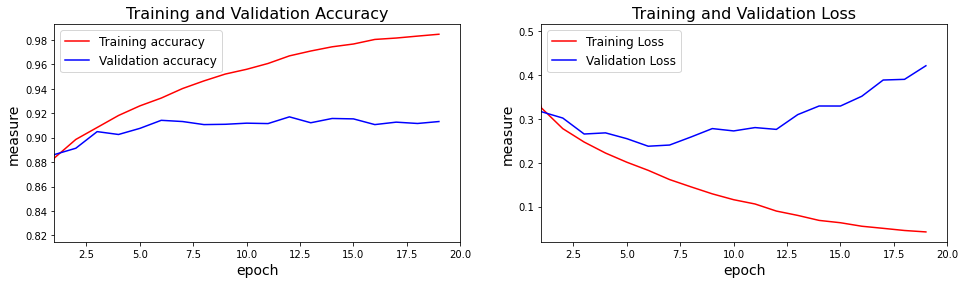

In [ ]:
import matplotlib.pyplot as plt

# Del objeto history, podemos sacar la información guardada a traveś del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

### Muestra de algunas predicciones

Calcula las clases predichas las probabilidades calculadas por softmax

In [ ]:
preds = model.predict(test_images)
print(preds.shape)

(10000, 10)


Observemos que las predicciones vienen en forma de probabilidad:

In [ ]:
#Elegir un elemento de test al azar
azar_test=np.random.randint(len(test_images))

#mostrar vecto de probabilidades (resultado del softmax)
print(preds[azar_test])

[4.3077085e-05 1.9202429e-10 8.4691548e-01 4.6502819e-09 1.4253940e-01
 9.3077679e-14 1.0501965e-02 1.0946842e-19 9.4079868e-14 3.5401962e-14]


Así pues, elegiremos el indice de la mayor probabilidad para elegir la etiqueta predicha:


In [ ]:
# Calcular el ínidce máximo por filas
label_preds=np.argmax(preds,axis=1)
print("Cuantos label predichos:",label_preds.shape,'\n')
print("Predicciones:\n")
print(label_preds)

Cuantos label predichos: (10000,) 

Predicciones:

[9 2 1 ... 8 1 5]


Así pues, de nuestro elemento elegido al azar, podemos decir que la predicción es:

In [ ]:
print("Etiqueta predicha:",label_preds[azar_test])
print("Prenda   predicha:",nombres_prendas[label_preds[azar_test]])

Etiqueta predicha: 2
Prenda   predicha: Jersey


Máquina vs Humano:



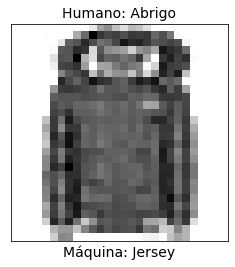

In [ ]:
print("Máquina vs Humano:\n")
plt.imshow(test_images[azar_test,:,:,0],cmap='binary')
#plt.axis('off')
plt.title('Humano: ' + nombres_prendas[test_labels[azar_test]],fontsize=14)
plt.xlabel("Máquina: "+ nombres_prendas[label_preds[azar_test]],fontsize=14)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### Detección de malas predicciones

In [ ]:
bad_pred=[]
for i in range (len(label_preds)):
    if label_preds[i]!=test_labels[i]:
        bad_pred.append(i)

bad_pred=np.array(bad_pred)

In [ ]:
print(bad_pred)
print("\nCuántas:",bad_pred.shape[0])

[  23   25   42   49   57   67   68   98  147  150  244  247  248  312
  316  324  378  379  381  382  389  395  441  444  455  457  460  468
  474  476  491  510  525  526  572  585  607  628  639  669  670  674
  688  706  711  713  724  732  738  753  760  787  851  877  881  890
  894  905  909  910  925  930  935  938  956  960  965  966  976  977
  979  985  997 1000 1004 1005 1025 1029 1101 1104 1107 1111 1125 1139
 1140 1142 1160 1162 1165 1174 1192 1194 1197 1210 1223 1224 1231 1234
 1236 1280 1286 1293 1300 1305 1312 1326 1329 1335 1336 1342 1374 1385
 1388 1399 1408 1425 1450 1462 1469 1471 1496 1501 1509 1522 1528 1533
 1572 1585 1602 1617 1620 1622 1626 1632 1642 1643 1650 1665 1679 1684
 1712 1739 1743 1744 1746 1777 1778 1810 1826 1836 1852 1856 1861 1867
 1879 1900 1922 1942 1943 1953 1964 1968 1980 2001 2006 2022 2037 2062
 2067 2069 2071 2082 2097 2104 2106 2110 2144 2162 2189 2191 2195 2236
 2239 2245 2252 2256 2278 2281 2290 2302 2309 2311 2318 2319 2326 2343
 2351 

Mala Predicción:



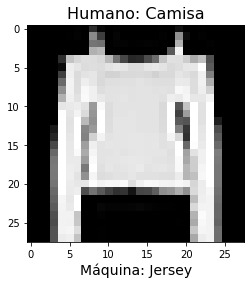

In [ ]:
azar_test= np.random.randint(len(bad_pred))
print("Mala Predicción:\n")

plt.title('Humano: ' +nombres_prendas[test_labels[bad_pred[azar_test]]],fontsize=16)
plt.imshow(test_images[bad_pred[azar_test],:,:,0],cmap='gray')
plt.xlabel("Máquina: "+nombres_prendas[np.argmax(preds[bad_pred[azar_test]])],fontsize=14)
plt.show()

### Matriz de Confusión 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix:\n')
print(confusion_matrix(test_labels, label_preds),'\n')

print(classification_report(test_labels, label_preds))

Confusion Matrix:

[[851   1  28  21   6   1  88   1   3   0]
 [  1 986   0   7   2   0   3   0   1   0]
 [ 17   2 906   5  36   0  33   0   1   0]
 [ 15   5  19 905  28   0  26   0   2   0]
 [  2   1  81  16 844   0  56   0   0   0]
 [  0   2   0   1   0 979   0  13   1   4]
 [ 98   0  92  28  45   0 730   0   7   0]
 [  0   0   0   0   0   9   0 972   0  19]
 [  2   2   7   3   3   2   5   3 972   1]
 [  1   0   0   0   0   4   0  41   0 954]] 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.80      0.91      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.88      0.84      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.73      0.75      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
       

In [ ]:
print(nombres_prendas)

['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botines']


### Visualizando Convoluciones 

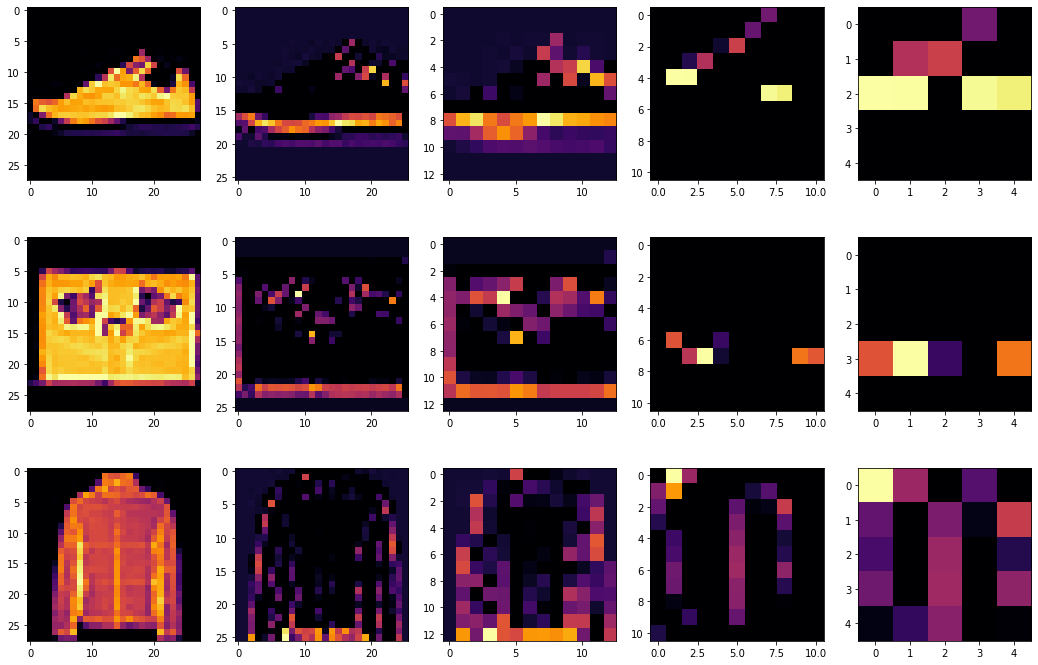

In [ ]:
f, axarr = plt.subplots(3,5,figsize=(18,12))

FIRST_IMAGE=np.random.randint(len(test_images))
SECOND_IMAGE=np.random.randint(len(test_images))
THIRD_IMAGE=np.random.randint(len(test_images))
CONVOLUTION_NUMBER=1


from tensorflow.keras import models


layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


#Originals

axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28),cmap='inferno')
axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28),cmap='inferno')
axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28),cmap='inferno')

# Convoluciones

for x in range(0,4):
  # Primera Imagen
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x+1].grid(False)
  # Segunda Imagen
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x+1].grid(False)
  # Tercera Imagen
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x+1].grid(False)


[[Volver al Inicio]](#Contenido)

## Dogs vs. Cats 

Hay un conjunto muy famoso en la historia de la visión por computador y los ciber ataques:

[**Dogs Vs. Cats**](https://www.kaggle.com/c/dogs-vs-cats)

"*Originalmente, esto fue un desafío en la construcción de un clasificador dirigido a los mejores profesionales de aprendizaje automático e inteligencia artificial del mundo, pero la tecnología ha avanzado tan rápido que verá cómo puede hacerlo en solo unos minutos con una simple programación de red neuronal convolucional.*" -Lawrence Moroney.

Cabe resaltar lo siguiente:

**Los conjuntos de juguete de MNIST/Fashion contenían imágenes del mismo tamaño y estaban a escala de grises**.

Esto se aleja un poco de la vida real, así que ahora enfrentaremos un problema más difícil.

**Un problema donde las imágenes vengan en todos los tamaños y en todos los colores :)**

Así que, como primera instancia, tendremos que hacer un pre-procesamiento de los datos.

Por ejemplo, colocaremos todas las imágenes del mismo tamaño (escalamiento).

Seguiremos los siguientes pasos:

1. Explorar el conjunto de datos.
2. Construir y Entrenar una red neuronal que reconozca la diferencia entre los dos.
3. Evaluar la precisión de Entrenamiento y Validación.

**ADVERTENCIA:** Este ejercicio puede ser muy pesado para su computador personal. Considere usar Colaboratory

### Explorando los Datos

La siguiente práctica la haremos en **Colaboratory**.

Si desea hacerlo de manera local, le recomendamos usar las rutas de ficheros apropiadas para su sistema operativo.

**Para este ejemplo, se usaraá una base filtrada de 2000 imágenes.**

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-10-08 18:51:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  88.0MB/s    in 0.7s    

2020-10-08 18:51:05 (88.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



### Descomprimiendo Datos 

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


### Generando listas de nombres 

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.743.jpg', 'cat.446.jpg', 'cat.579.jpg', 'cat.535.jpg', 'cat.801.jpg', 'cat.263.jpg', 'cat.806.jpg', 'cat.288.jpg', 'cat.387.jpg', 'cat.601.jpg']
['dog.651.jpg', 'dog.511.jpg', 'dog.849.jpg', 'dog.300.jpg', 'dog.952.jpg', 'dog.713.jpg', 'dog.118.jpg', 'dog.154.jpg', 'dog.104.jpg', 'dog.129.jpg']


###  Verificando cantidades de Datos

In [ ]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)),'\n')

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000 

total validation cat images : 500
total validation dog images : 500


### Visualizando algunos Ejemplos

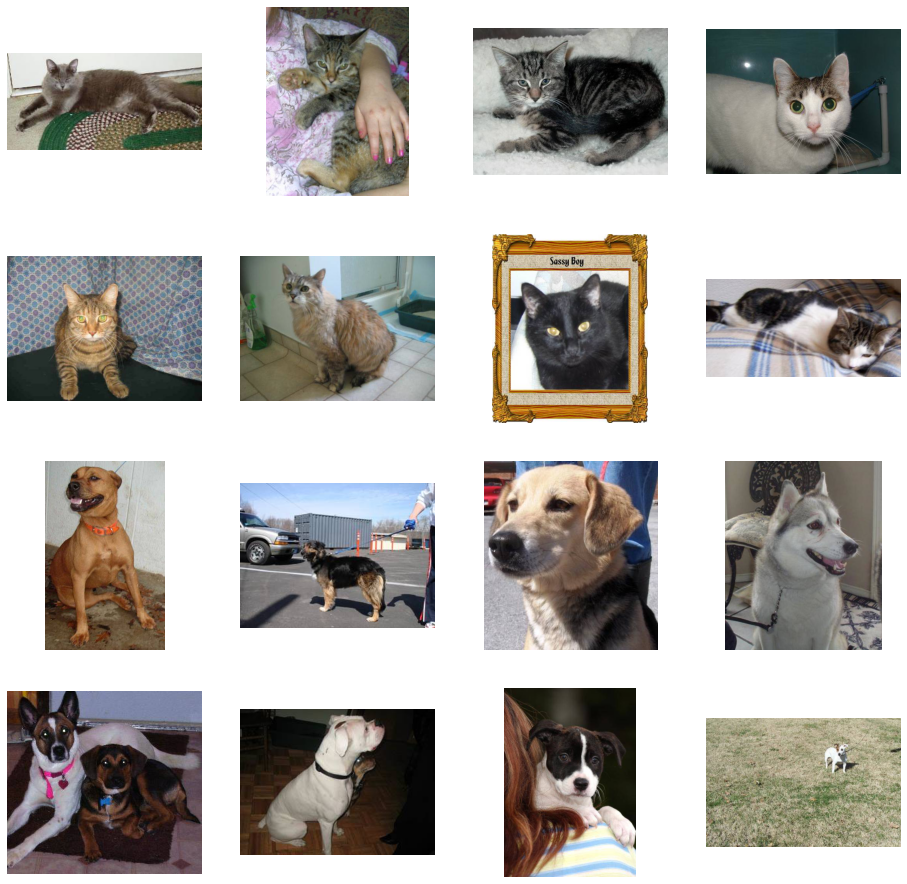

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Malla de imagenes 4x4
nrows = 4
ncols = 4

# Indice aleatorio para iterar sobre las imagenes
pic_index = np.random.randint(len(os.listdir(train_cats_dir))-8) 

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Tomar hilera de 8 desde índice elegido
pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### Diseñando Red Neuronal

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Veamos un resumen de la red para ver el número de parámetros y estructura.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

### Compilar Modelo 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

###  Generador de Imagenes para el entrenamiento

En este punto observaremos algo nuevo.

Como tenemos muchos datos, y sería muy pesado para el computador tenerlos en memoria, generaremos un apuntador a los directorios que contienen las imágenes e iremos leyendolas a medida que se va entrenando la red.

Estos apuntadores se conocen como **ImageDataGenerator**.

Son herramientas muy útiles, porque además permiten aumentar el número de datos de manera artificial y por ejemplo, escalar los datos a un mismo tamaño.

**Los invitamos a revisar sus parámetros opcionales, se sorprenderán.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizar Datos
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flujo de imagenes de entrenamiento en grupos de 20, escalando a 150x150 usando train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flujo de imagenes de validación en grupos de 20, escalando a 150x150 usando test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Para más opciones del generador, puedes ir [aquí](https://keras.io/api/preprocessing/image/)

### Entrenar Modelo de Red Neuronal Convolucional

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=1)

Epoch 1/15
100/100 [==============================] - 8s 84ms/step - loss: 0.8024 - accuracy: 0.5485 - val_loss: 0.6636 - val_accuracy: 0.6010
Epoch 2/15
100/100 [==============================] - 8s 82ms/step - loss: 0.6580 - accuracy: 0.6425 - val_loss: 0.7138 - val_accuracy: 0.5320
Epoch 3/15
100/100 [==============================] - 8s 81ms/step - loss: 0.5691 - accuracy: 0.7130 - val_loss: 0.6211 - val_accuracy: 0.6880
Epoch 4/15
100/100 [==============================] - 8s 81ms/step - loss: 0.4843 - accuracy: 0.7780 - val_loss: 0.6269 - val_accuracy: 0.6800
Epoch 5/15
100/100 [==============================] - 8s 81ms/step - loss: 0.3914 - accuracy: 0.8290 - val_loss: 0.6529 - val_accuracy: 0.6930
Epoch 6/15
100/100 [==============================] - 8s 81ms/step - loss: 0.2889 - accuracy: 0.8745 - val_loss: 0.7574 - val_accuracy: 0.6800
Epoch 7/15
100/100 [==============================] - 8s 81ms/step - loss: 0.2268 - accuracy: 0.9165 - val_loss: 1.0042 - val_accuracy: 0.6870

In [ ]:
model.save('Cats_v_Dogs.h5')

In [ ]:
model=tf.keras.models.load_model('Cats_v_Dogs.h5')

### Haciendo uso del Modelo (Sólo funciona en Colab) 

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

#Cargar imagen desde Colab
uploaded=files.upload()

for fn in uploaded.keys():
 
    # Cargar imagen
    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))
    
    #Preprocesar Imagen
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    # Usar Modelo (Predecir Imagen)
    classes = model.predict(images, batch_size=10)
    # Mostrar resultados
    print(classes)
    #Clasificar
    if classes[0]>0:
      print(fn + " Es un Perro")

    else:
      print(fn + " Es un Gato")

In [ ]:
preds=model.predict(validation_generator)
print(preds[:10])

[[9.7704566e-01]
 [3.2390151e-02]
 [9.2304802e-01]
 [9.9947757e-01]
 [3.6334749e-02]
 [1.0000000e+00]
 [9.9929297e-01]
 [4.9476796e-07]
 [9.7778553e-01]
 [9.9992168e-01]]


### Visualizando Representaciones Intermedias

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


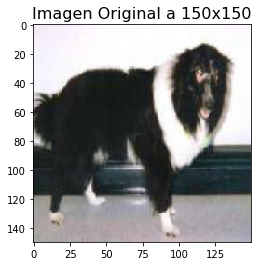

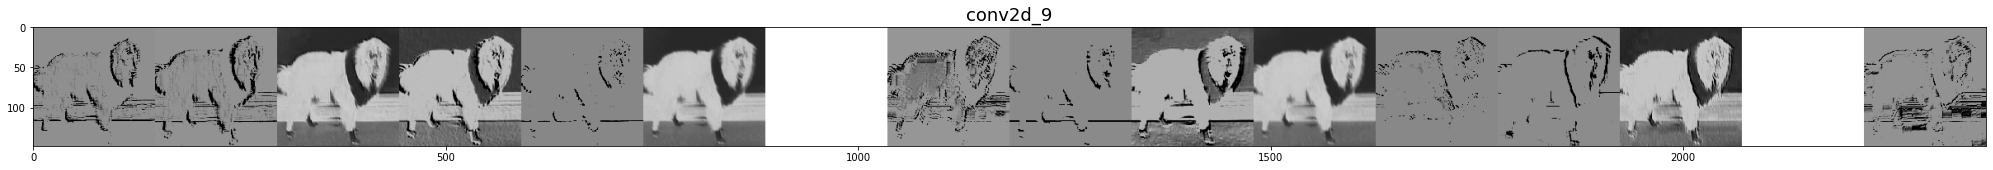

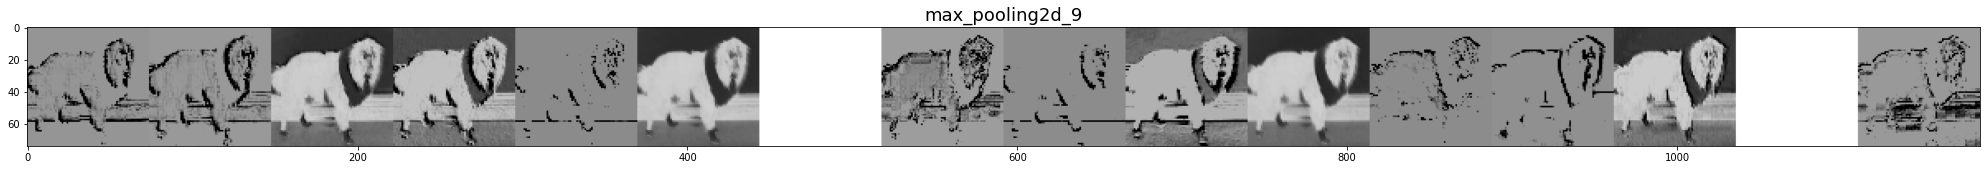

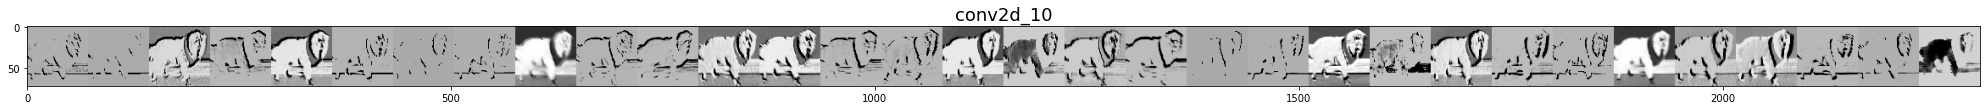

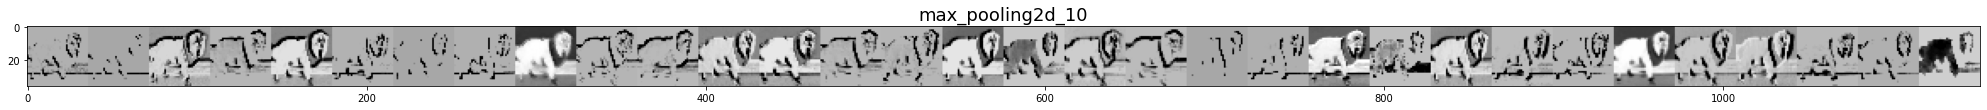

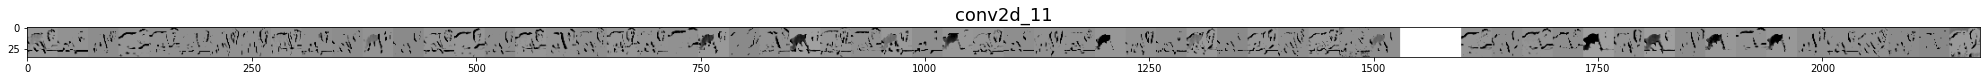

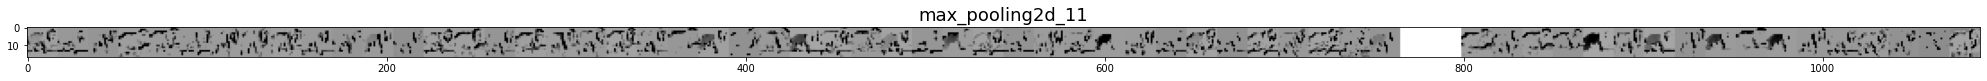

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[:-3]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Mostrar Imagen Original
plt.figure()
plt.imshow(img)
plt.grid(False)
plt.title("Imagen Original a 150x150",fontsize=16)

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

      #-------------------------------------------
      # Just do this for the conv / maxpool layers, not the fully-connected layers
      #-------------------------------------------
      n_features = feature_map.shape[-1]  # number of features in the feature map
      size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
      # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))

      #-------------------------------------------------
      # Postprocess the feature to be visually palatable
      #-------------------------------------------------
      for i in range(n_features):
          x  = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std ()
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
          display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 35. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title (layer_name, fontsize=18)
    plt.grid (False)
    plt.imshow(display_grid, aspect='auto', cmap='binary') 
    plt.show()

### Gráficas de funciones de pérdida y accuracy

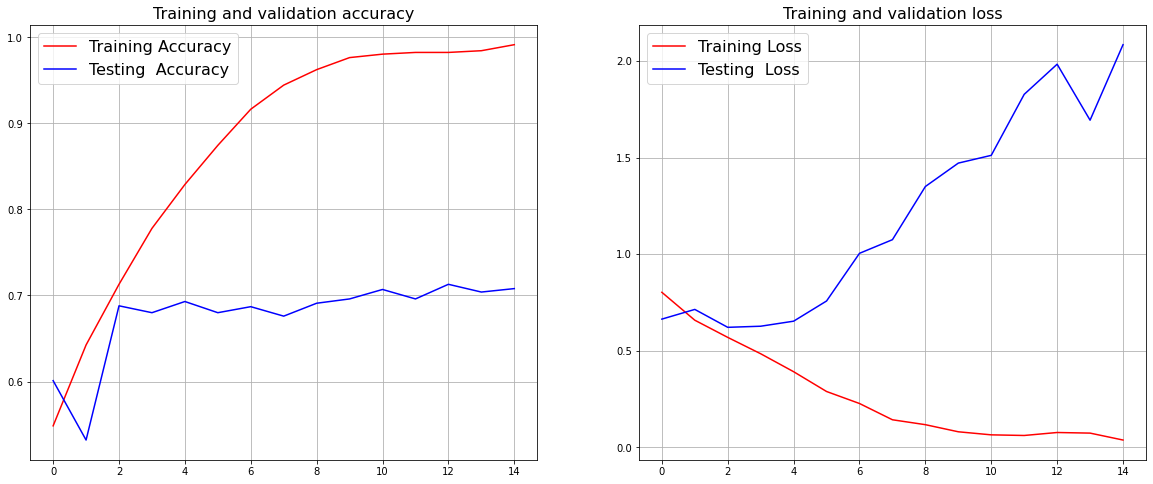

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.figure(figsize=(20,8))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(121)
plt.plot  ( epochs,     acc,'r',label='Training Accuracy' )
plt.plot  ( epochs, val_acc,'b',label='Testing  Accuracy' )
plt.title ('Training and validation accuracy',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(122)
plt.plot  ( epochs,     loss,'r',label='Training Loss' )
plt.plot  ( epochs, val_loss,'b',label='Testing  Loss' )
plt.title ('Training and validation loss',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.show()

### Liberar recursos y RAM 

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

[[Volver al Inicio]](#Contenido)

## Horse or Human

### Historia 

Podremos encontrar un poco de historia sobre este dataset [aquí](https://www.kaggle.com/sanikamal/horses-or-humans-dataset).

### Cargar Datos

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-08 19:43:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  45.4MB/s    in 3.1s    

2020-10-08 19:43:22 (45.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-10-08 19:43:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  50.1MB/s    in 0.2s    

2020-10-08 19:43:22 (50.1 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse08-4.png', 'horse33-4.png', 'horse49-9.png', 'horse22-6.png', 'horse35-5.png', 'horse05-5.png', 'horse45-9.png', 'horse23-7.png', 'horse50-2.png', 'horse40-2.png']
['human04-21.png', 'human11-07.png', 'human02-17.png', 'human09-24.png', 'human06-07.png', 'human09-05.png', 'human13-23.png', 'human09-18.png', 'human13-12.png', 'human07-02.png']
['horse5-259.png', 'horse4-202.png', 'horse5-235.png', 'horse1-127.png', 'horse1-484.png', 'horse2-441.png', 'horse6-403.png', 'horse5-123.png', 'horse4-599.png', 'horse1-539.png']
['valhuman02-08.png', 'valhuman01-24.png', 'valhuman03-14.png', 'valhuman03-00.png', 'valhuman03-16.png', 'valhuman04-23.png', 'valhuman01-12.png', 'valhuman03-21.png', 'valhuman04-00.png', 'valhuman04-03.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

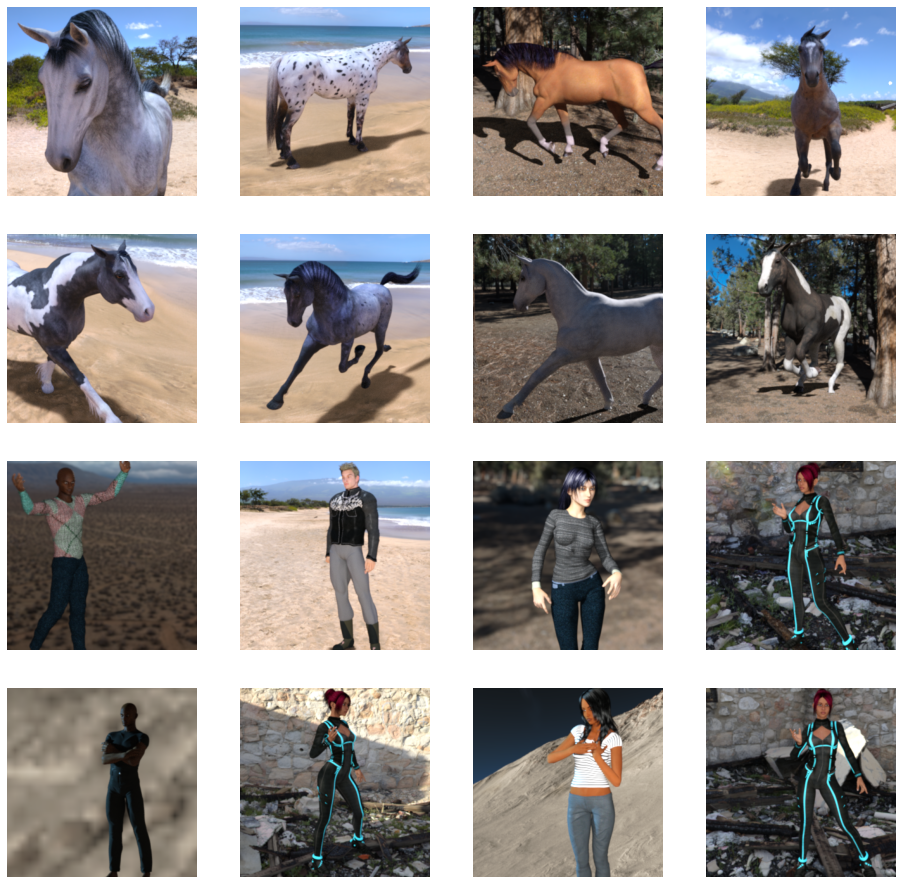

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 6s 696ms/step - loss: 0.8821 - accuracy: 0.5584 - val_loss: 1.1655 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 6s 785ms/step - loss: 0.6138 - accuracy: 0.7471 - val_loss: 0.5413 - val_accuracy: 0.7852
Epoch 3/15
8/8 [==============================] - 6s 745ms/step - loss: 0.4312 - accuracy: 0.8610 - val_loss: 3.1877 - val_accuracy: 0.5586
Epoch 4/15
8/8 [==============================] - 6s 745ms/step - loss: 0.4659 - accuracy: 0.7853 - val_loss: 0.9807 - val_accuracy: 0.8164
Epoch 5/15
8/8 [==============================] - 6s 743ms/step - loss: 0.2131 - accuracy: 0.9121 - val_loss: 1.0936 - val_accuracy: 0.7852
Epoch 6/15
8/8 [==============================] - 7s 832ms/step - loss: 0.1631 - accuracy: 0.9277 - val_loss: 1.8942 - val_accuracy: 0.7695
Epoch 7/15
8/8 [==============================] - 6s 794ms/step - loss: 0.3668 - accuracy: 0.8701 - val_loss: 1.6096 - val_accuracy: 0.7812
Epoch 8/15
8/8 [====

In [ ]:
model.save('Horses_or_Humans.h5')

In [ ]:
model=tf.keras.models.load_model('Horses_or_Humans.h5')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


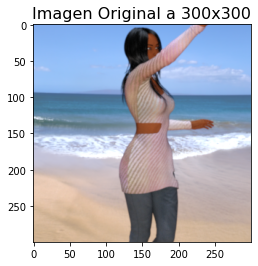

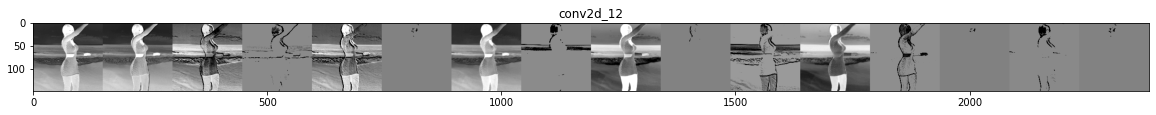

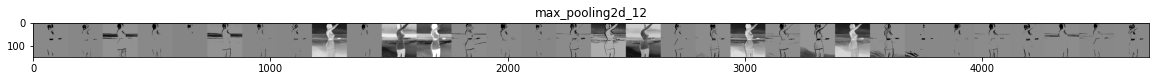

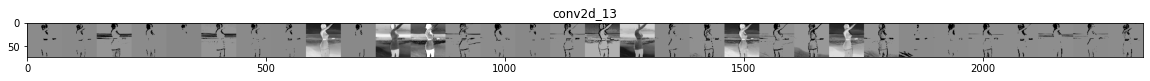

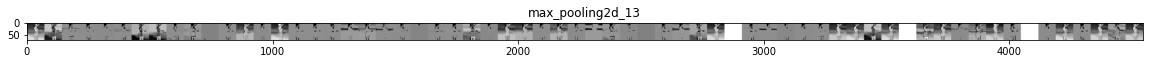

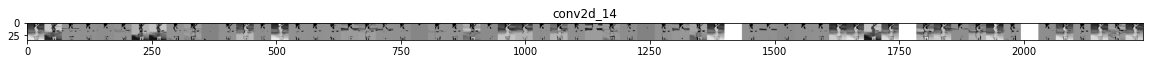

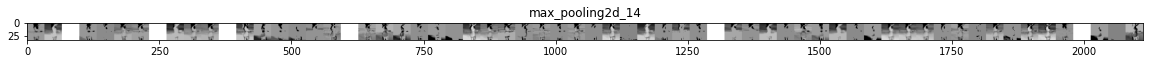

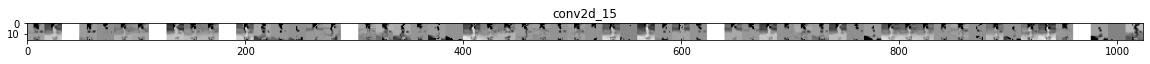

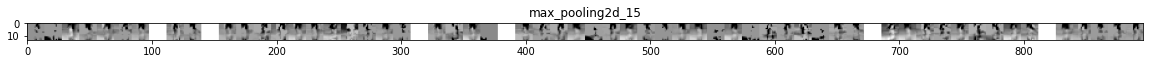

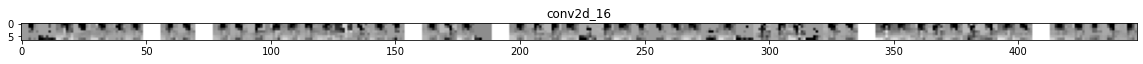

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[:-2]]

# Mostrar Imagen Original
plt.figure()
plt.imshow(img)
plt.grid(False)
plt.title("Imagen Original a 300x300",fontsize=16)

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='binary')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

[[Volver al Inicio]](#Contenido)

### Piedra Papel o Tijeras

Este ejemplo es un poco más complejo, pues haremos clasificación en tres clases de manos de diferentes tipos.

Las manos humanas tienen muchos rasgos distintos que hace que el proceso de clasificación no sea trivial.

### Cargar Datos

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-10-08 19:45:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  45.1MB/s    in 4.2s    

2020-10-08 19:45:47 (45.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-10-08 19:45:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving 

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-071.png', 'rock02-049.png', 'rock06ck02-078.png', 'rock01-012.png', 'rock01-049.png', 'rock01-092.png', 'rock01-114.png', 'rock05ck01-053.png', 'rock06ck02-021.png', 'rock02-113.png']
['paper05-107.png', 'paper01-072.png', 'paper04-025.png', 'paper05-097.png', 'paper03-048.png', 'paper03-029.png', 'paper02-032.png', 'paper02-013.png', 'paper01-045.png', 'paper06-081.png']
['scissors04-088.png', 'scissors01-052.png', 'scissors02-061.png', 'scissors02-080.png', 'testscissors03-031.png', 'scissors04-073.png', 'scissors02-063.png', 'scissors02-027.png', 'scissors01-017.png', 'testscissors01-117.png']


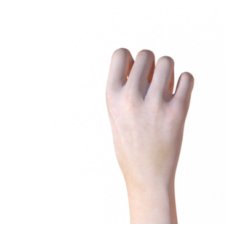

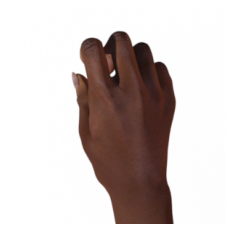

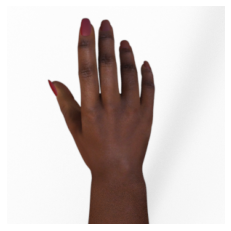

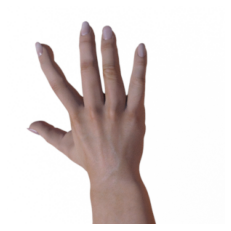

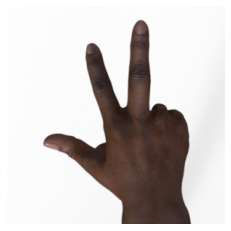

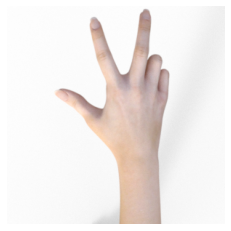

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Aumentando Datos

Una técnica natural en DL para obtener datos sintéticos que pueden ayudar a la red neuronal es mediante la técnica llamada aumentación de datos (Data augmentation)

Vemos un blog al respecto:

[Exploring Data Augmentation with Keras and TensorFlow](https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844)

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

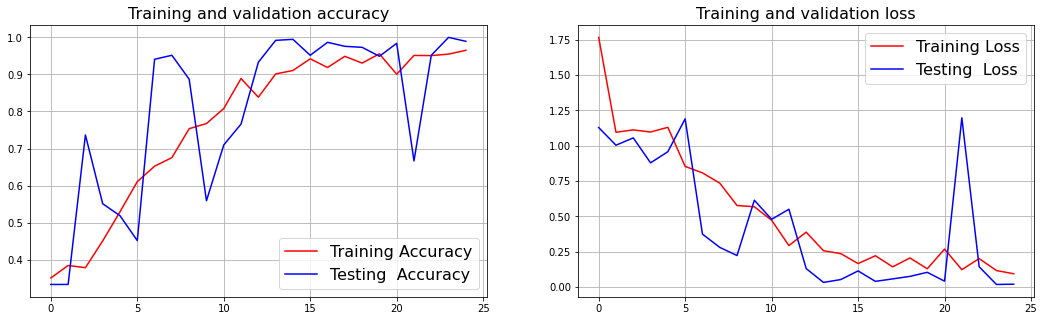

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(18,5))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(121)
plt.plot  ( epochs,     acc,'r',label='Training Accuracy' )
plt.plot  ( epochs, val_acc,'b',label='Testing  Accuracy' )
plt.title ('Training and validation accuracy',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(122)
plt.plot  ( epochs,     loss,'r',label='Training Loss' )
plt.plot  ( epochs, val_loss,'b',label='Testing  Loss' )
plt.title ('Training and validation loss',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [ ]:
model=tf.keras.models.load_model('rps.h5')

In [ ]:
preds=model.predict(validation_generator)
preds[:5]

array([[6.1073937e-09, 9.9999928e-01, 6.6503407e-07],
       [1.4923323e-07, 9.9999988e-01, 1.0823758e-08],
       [8.9176693e-09, 9.9999952e-01, 4.2809245e-07],
       [9.9999690e-01, 2.6853102e-06, 3.9489521e-07],
       [9.9999976e-01, 1.2737560e-07, 1.3945728e-07]], dtype=float32)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  ## [paper,rock,scissors]

Saving 2020-10-08-113519.jpg to 2020-10-08-113519 (4).jpg
2020-10-08-113519.jpg
[[0. 1. 0.]]


**Conclusión**: A jugar!


[[Volver al Inicio]](#Contenido)